# Image Histogram Equalization

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
img = Image.open('image2.jpg')
img = img.convert('L')
image_array = np.array(img)

In [4]:
def histogram_equalization(image_array):
    flat_img = image_array.flatten()
    hist = [0] * 256
    for Value in flat_img:
        hist[Value] += 1
    cdf = [0] * 256
    cdf[0] = hist[0]
    for i in range(1, len(hist)):
        cdf[i] += (cdf[i - 1] + hist[i])
    
    cdf_scaled = []
    cdf_min = min(cdf)
    for value in cdf:        
        cdf_scaled.append(round((value - cdf_min) / (image_array.size - cdf_min) * 255))

    equalized_image = []
    for pixel in flat_img:
        equalized_image.append(cdf_scaled[pixel])
    equalized_image = np.reshape(equalized_image, image_array.shape)
    return equalized_image.astype(np.uint8)
        

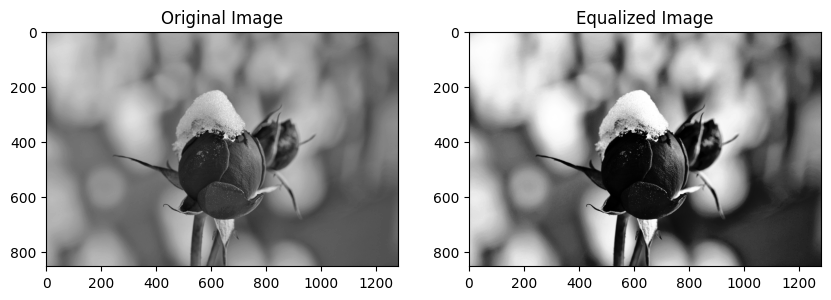

In [5]:
equalized_image = histogram_equalization(image_array)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.show()